In [1]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Unnamed: 32', 'id'])
# эквивалентно:
# df = df.loc[:, df.columns[10:]]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [2]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


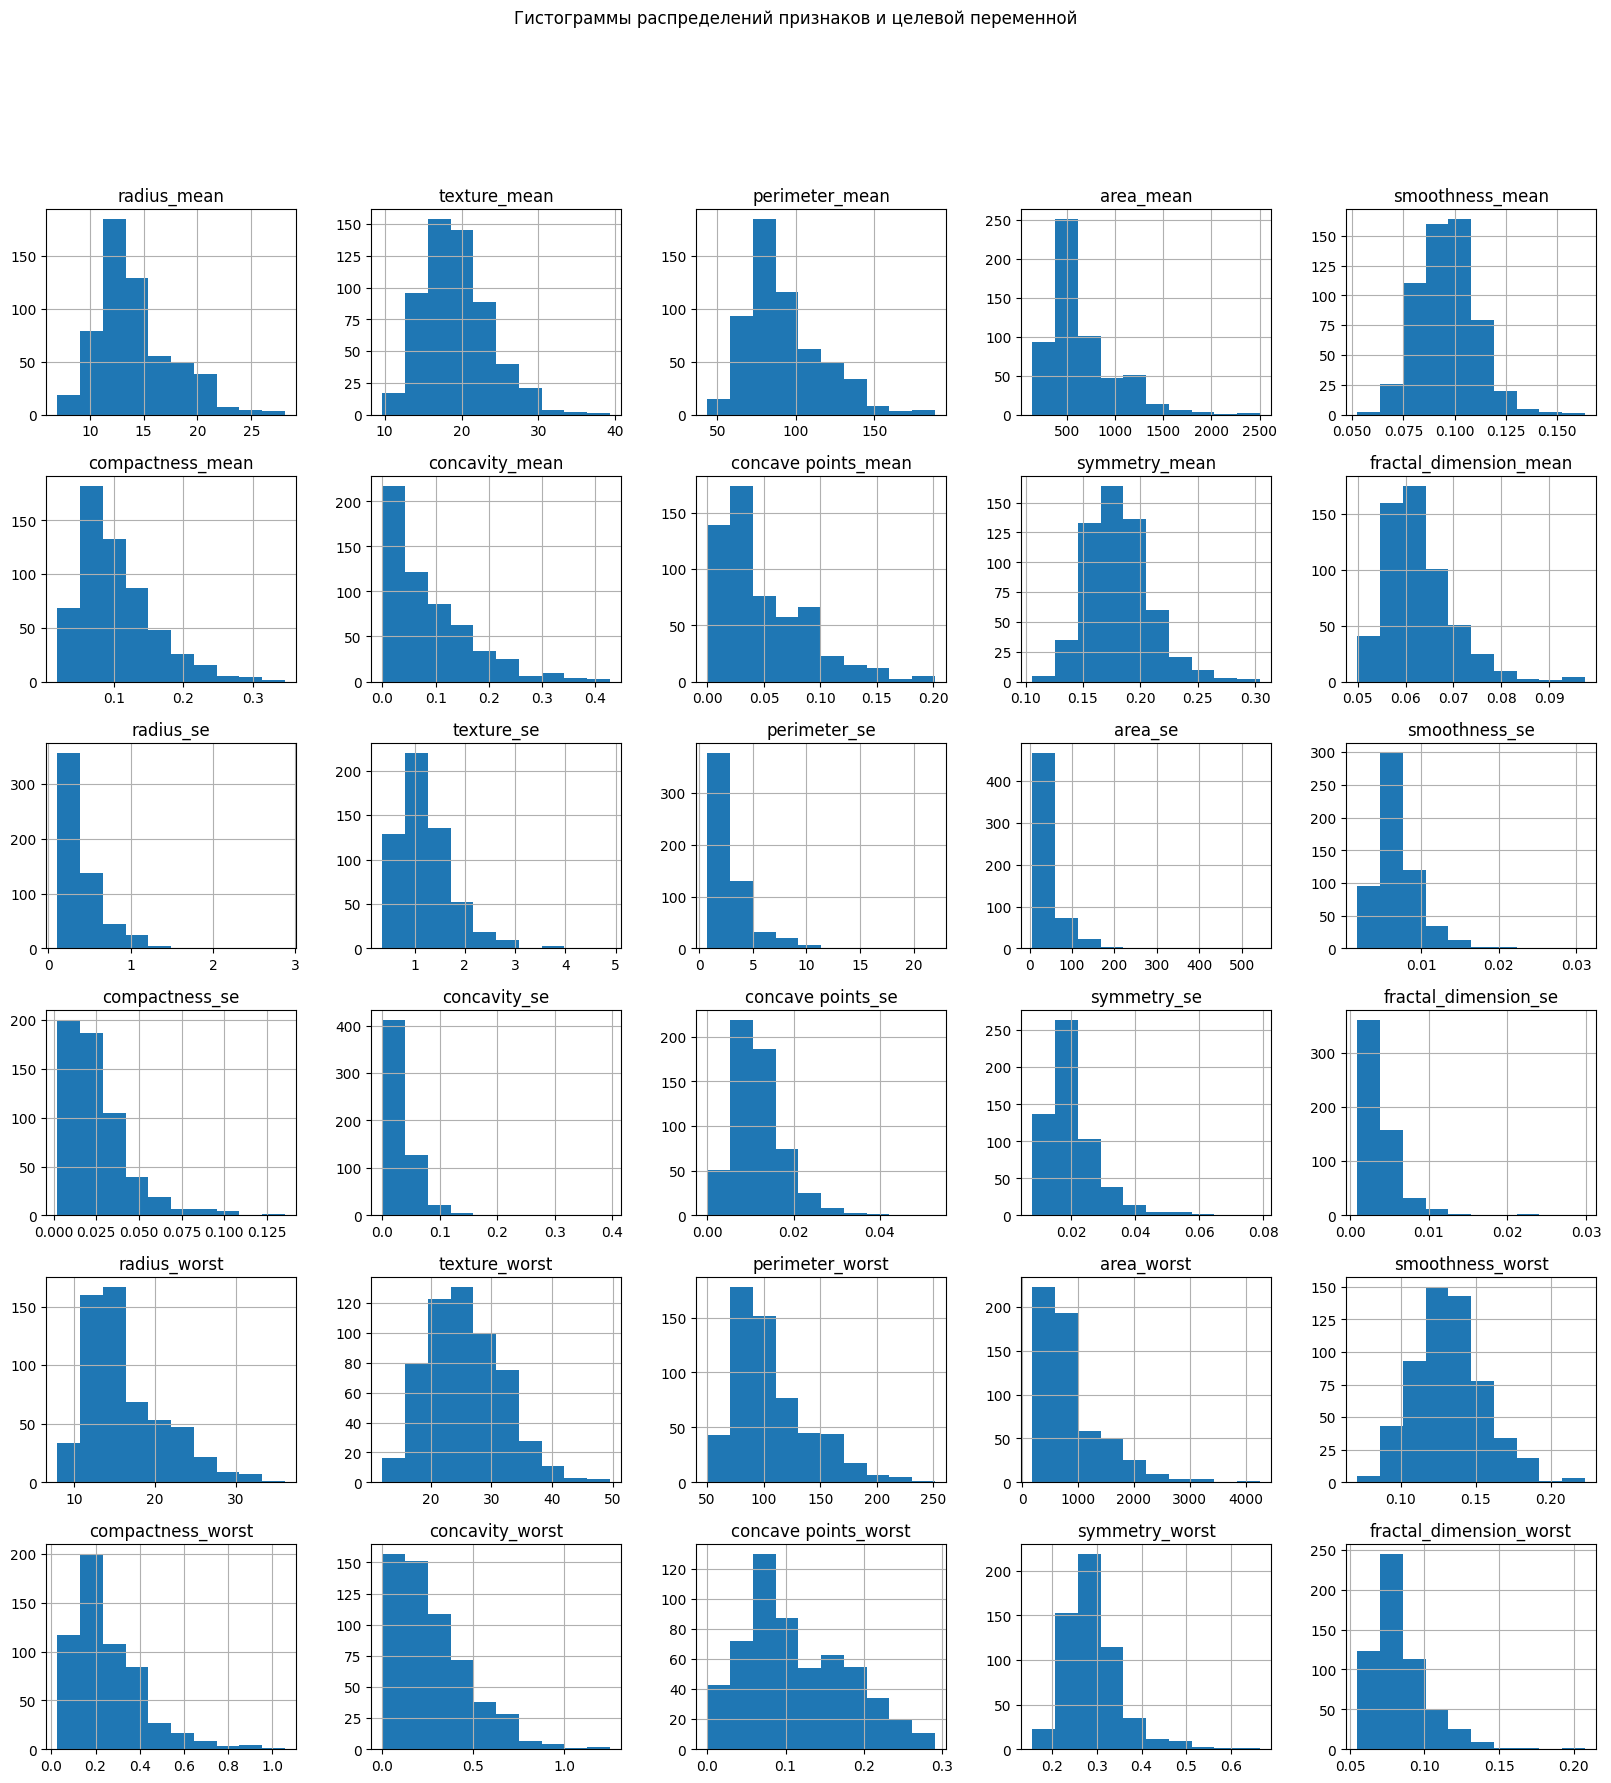

In [3]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20, 20))
plt.suptitle("Гистограммы распределений признаков и целевой переменной")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

map_diagnosis = {'M':1, 'B':0}

df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

scaler = StandardScaler()


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# print(y_test.count())

metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}


def build_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    
    if model_name == "DecisionTree":
        plt.figure(figsize=(24, 12))
        plot_tree(
            model_tree,
            filled=True,
            feature_names=X.columns,
            class_names=['Malignant', 'Benign'],
            fontsize=10
        )
        plt.show()
        
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)
    

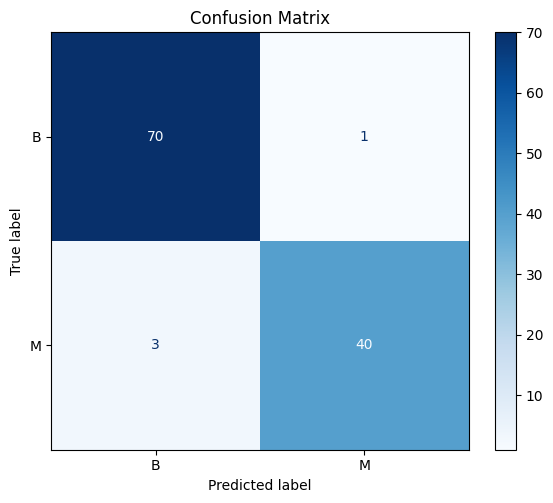

Accuracy:  0.9649122807017544


In [6]:
model_gaussianNB = GaussianNB()
build_model(model_gaussianNB, "GaussianNB")

In [7]:
smoothing = [0, 1, 2, 3, 4, 5]
for sm in smoothing:
    print("var_smoothing  =", sm)
    model = GaussianNB(var_smoothing=sm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

var_smoothing  = 0
[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
var_smoothing  = 1
[[71  0]
 [ 7 36]]
Accuracy:  0.9385964912280702
var_smoothing  = 2
[[71  0]
 [11 32]]
Accuracy:  0.9035087719298246
var_smoothing  = 3
[[71  0]
 [13 30]]
Accuracy:  0.8859649122807017
var_smoothing  = 4
[[71  0]
 [14 29]]
Accuracy:  0.8771929824561403
var_smoothing  = 5
[[71  0]
 [15 28]]
Accuracy:  0.868421052631579


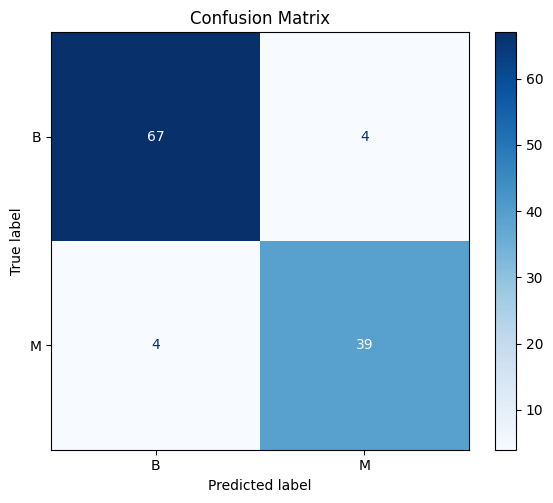

Accuracy:  0.9298245614035088


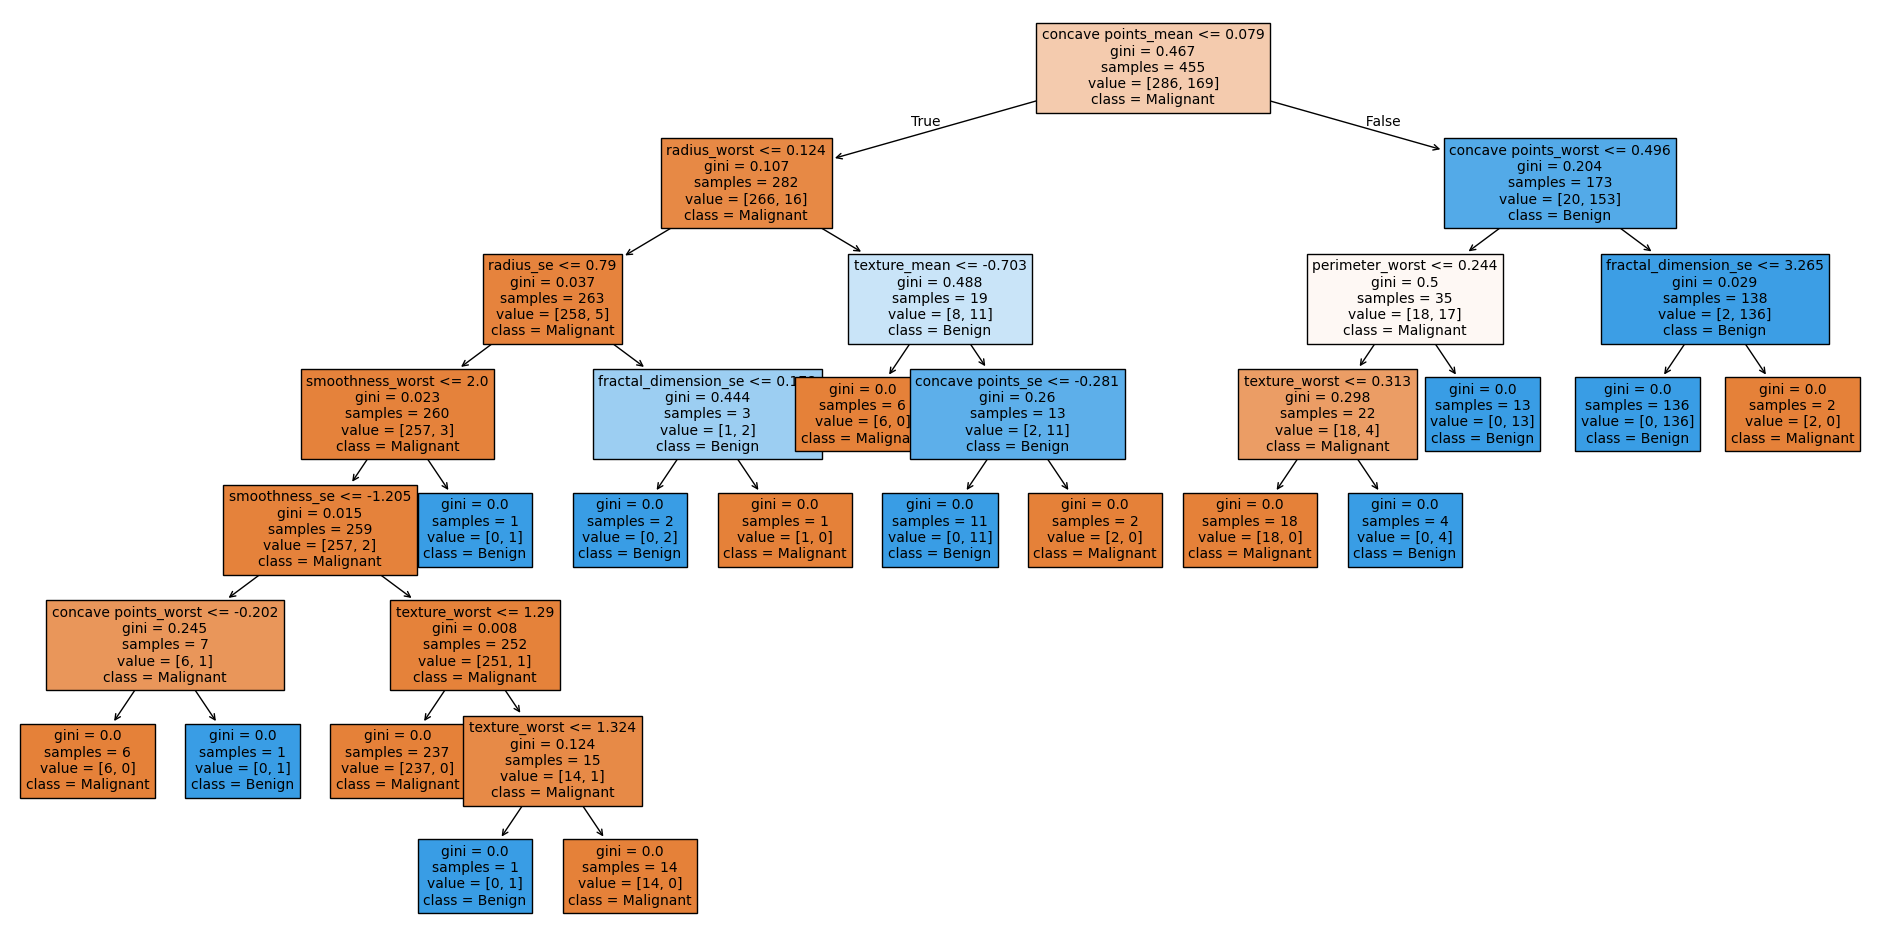

In [8]:
model_tree = DecisionTreeClassifier()
build_model(model_tree, "DecisionTree")


In [9]:
criterion = ['entropy', 'gini']

for cr in criterion:
    for i in range (1,5):
        model = DecisionTreeClassifier(
            criterion=cr, 
            max_depth=i, 
            random_state=42
        )
        print(f"criterion: {cr}, max_depth = {i}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy: ", accuracy_score(y_test, y_pred))

criterion: entropy, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: entropy, max_depth = 2
[[63  8]
 [ 2 41]]
Accuracy:  0.9122807017543859
criterion: entropy, max_depth = 3
[[71  0]
 [ 4 39]]
Accuracy:  0.9649122807017544
criterion: entropy, max_depth = 4
[[70  1]
 [ 5 38]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: gini, max_depth = 2
[[69  2]
 [ 6 37]]
Accuracy:  0.9298245614035088
criterion: gini, max_depth = 3
[[69  2]
 [ 4 39]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 4
[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315


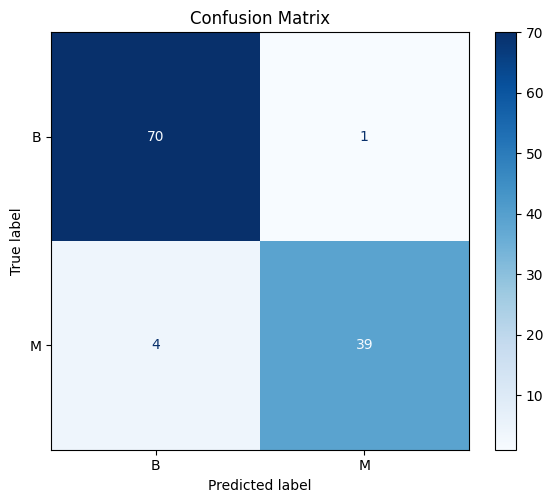

Accuracy:  0.956140350877193


In [10]:
model_lda = LinearDiscriminantAnalysis()
build_model(model_lda, "LDA")

In [11]:
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.5] 

for s in solvers:
    for sh in shrinkages:
        if s == 'svd' and sh is not None:
            continue
        model = LinearDiscriminantAnalysis(solver=s, shrinkage=sh)
        print(f"solver: {s}, shrinkage={sh}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print()

solver: svd, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: lsqr, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: eigen, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544



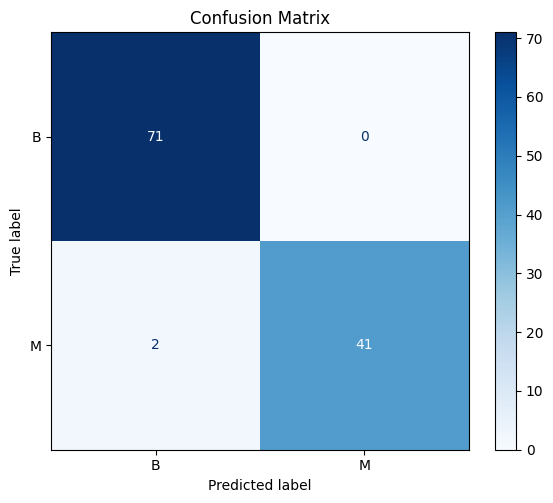

Accuracy:  0.9824561403508771


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_svc = SVC(
    kernel='rbf',     # тип ядра (функция, задающая форму разделяющей границы)
    C=1.0,            # параметр штрафа за ошибки
    gamma='auto',    # коэффициент ядра (для rbf, poly, sigmoid)
    random_state=42
)

build_model(model_svc, "SVC")




In [13]:
c = [0.5, 1, 2]
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
gamma = ['auto', 'scale']
for i in c:
    for k in kernels:
        for g in gamma:
            if k != 'linear':
                model = SVC(C=i, kernel=k, gamma=g)
                print(f"C = {i}, kernel: {k}, gamma: {g}")
            else: 
                model = SVC(C=i, kernel=k, gamma=g)
                print(f"C = {i}, kernel: {k}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

C = 0.5, kernel: rbf, gamma: auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: rbf, gamma: scale
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: poly, gamma: auto
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: poly, gamma: scale
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: sigmoid, gamma: auto
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 0.5, kernel: sigmoid, gamma: scale
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: rbf, gamma: auto
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: rbf, gamma: scale
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: poly, gamma: auto
[[71  0]


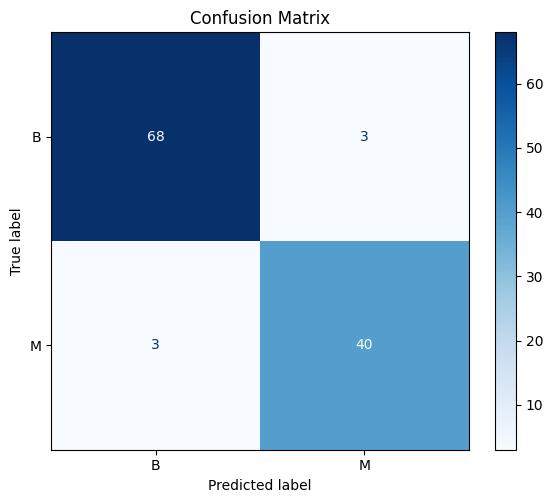

Accuracy:  0.9473684210526315


In [14]:
model_kneighbors = KNeighborsClassifier()
build_model(model_kneighbors, "KNeighbors")

In [15]:
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors = [5, 10, 15]
for n in neighbors:
    for w in weights:
        for a in algorithms:
            model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            print(f"n_neighbors: {n}, weights: {w}, algorithm: {a}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

n_neighbors: 5, weights: uniform, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 10, weights: uniform, algorithm: auto
[[69  2]
 [ 3 40]]
Accuracy: 0.956140350877193

n_neighbors: 10, weights: uniform, algorithm: ball_tree
[[69  2]
 [ 3 40]]
Accuracy: 0.

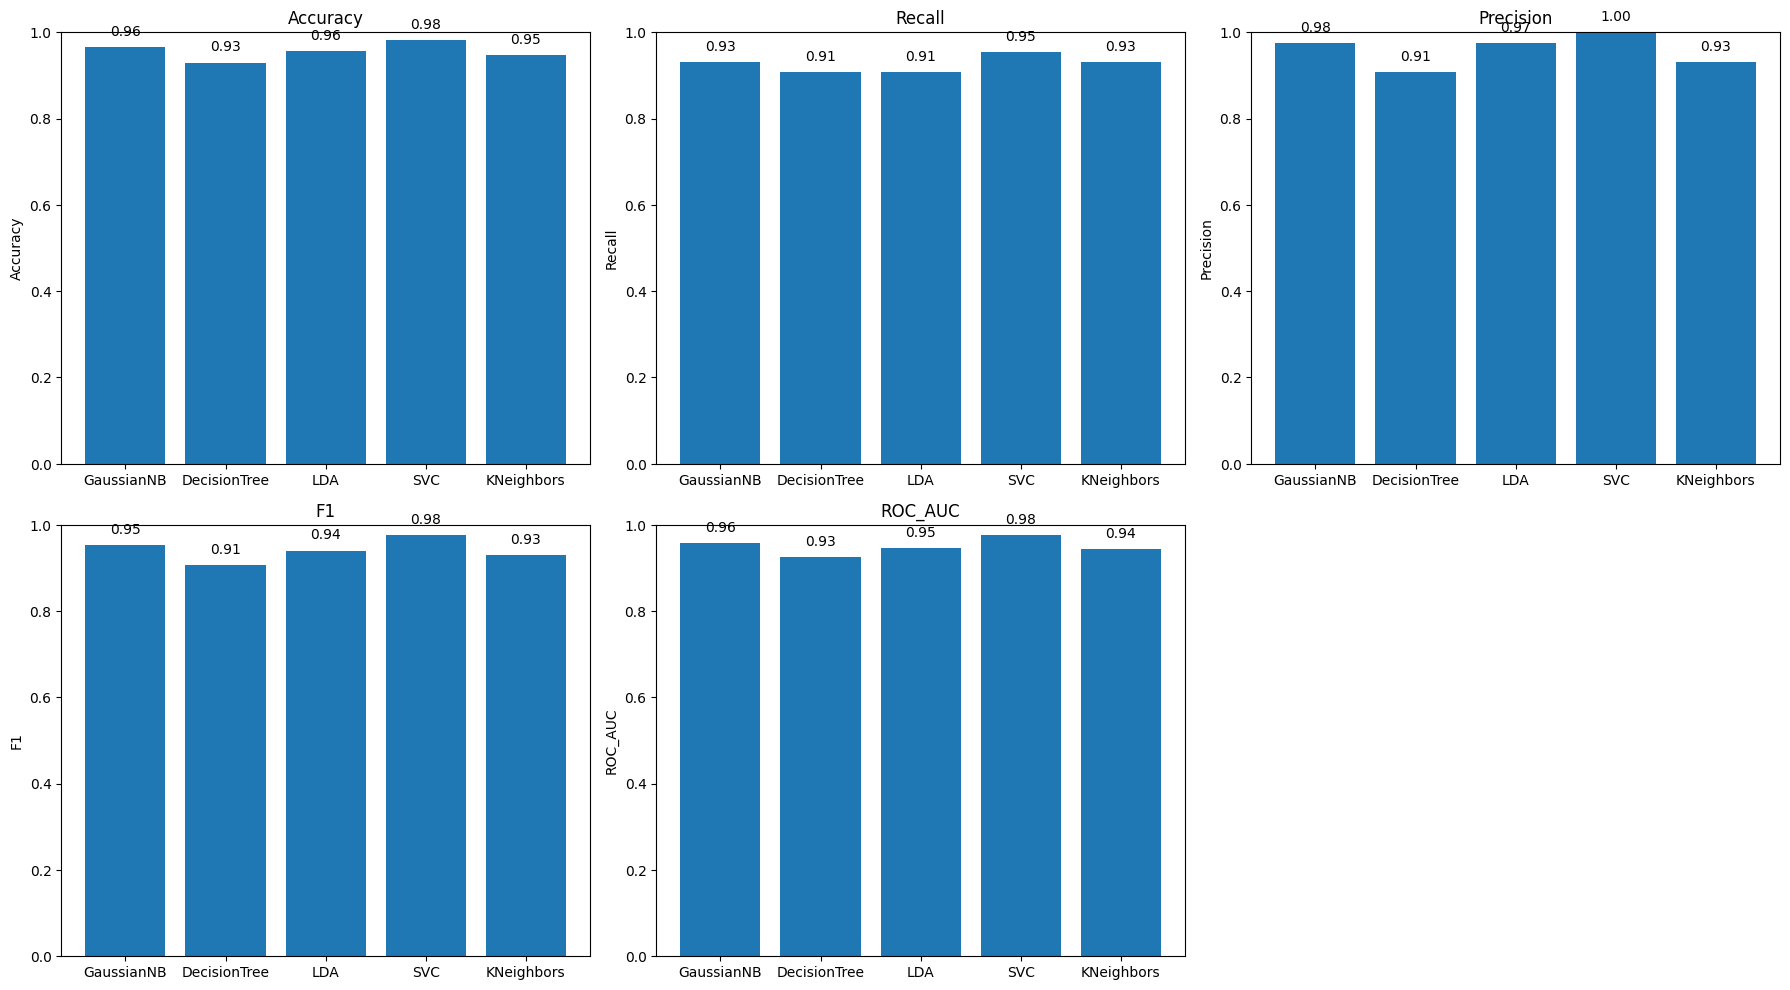

In [16]:
import matplotlib.pyplot as plt

# Преобразуем словарь в DataFrame, если ещё не сделали
metrics_df = pd.DataFrame(metrics_dict)

# Список метрик для отображения
metric_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']

plt.figure(figsize=(18, 10))

for i, metric in enumerate(metric_names, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df['Model'], metrics_df[metric])
    plt.title(metric)
    plt.ylim(0, 1)  # Метрики от 0 до 1
    # Подписи над столбцами
    for j, val in enumerate(metrics_df[metric]):
        plt.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


In [17]:
# Полный скрипт: обучение, эксперименты, TensorBoard, визуализация
import os
import shutil
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, optimizers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# ---------- 0. ПАРАМЕТРЫ / НАСТРОЙКИ ----------
RANDOM_STATE = 42
BASE_LOG_DIR = "logs_tensorboard"   # базовая папка для логов (меняй при необходимости)

# ---------- 1. ПОДГОТОВКА ДАННЫХ ----------
# Ожидается, что df уже загружен в окружение и содержит столбец 'diagnosis'
# Если у тебя датафрейм называется по-другому, замени имя.
try:
    df  # если df есть в namespace
except NameError:
    raise RuntimeError("В окружении не найден DataFrame `df`. Помести сюда DataFrame с колонкой 'diagnosis'.")

# Признаки и целевая
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'B':0, 'M':1}) if df['diagnosis'].dtype == object else df['diagnosis']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Стандартизация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Приведение к numpy float32 для TF
X_train_np = np.asarray(X_train, dtype=np.float32)
X_test_np  = np.asarray(X_test, dtype=np.float32)
y_train_np = np.asarray(y_train, dtype=np.float32)
y_test_np  = np.asarray(y_test, dtype=np.float32)

# ---------- 2. УТИЛИТЫ: очистка логов, генерация имени запуска ----------
def prepare_log_dir(base=BASE_LOG_DIR):
    # Удалим старую папку только если она является файлом (или по желанию всю директорию)
    if os.path.exists(base):
        # если хочешь сохранять старые логи — закомментируй следующий блок
        try:
            shutil.rmtree(base)
        except Exception:
            # если вдруг ошибка, удаляем файл
            if os.path.isfile(base):
                os.remove(base)
    os.makedirs(base, exist_ok=True)
    return base

def run_log_dir(name):
    ts = datetime.now().strftime("%Y%m%d-%H%M%S")
    path = os.path.join(BASE_LOG_DIR, f"{name}_{ts}")
    os.makedirs(path, exist_ok=True)
    return path

prepare_log_dir()

# ---------- 3. Фабрика модели ----------
def build_model(input_shape,
                architecture='small',
                activation='relu',
                dropout=0.2,
                l2=0.0,
                learning_rate=1e-3):
    """
    architecture: 'small' (2 dense), 'medium' (3 dense), 'large' (4 dense)
    activation: 'relu', 'tanh', 'elu' и т.д.
    dropout: dropout rate
    l2: коэффициент L2 регуляризации
    """
    inp = layers.Input(shape=(input_shape,))
    x = inp

    # базовые архитектуры
    if architecture == 'small':
        units = [32, 16]
    elif architecture == 'medium':
        units = [64, 32, 16]
    elif architecture == 'large':
        units = [128, 64, 32, 16]
    else:
        raise ValueError("architecture must be 'small','medium' or 'large'")

    for u in units:
        x = layers.Dense(u, activation=activation,
                         kernel_regularizer=regularizers.l2(l2))(x)
        x = layers.BatchNormalization()(x)
        if dropout and dropout > 0:
            x = layers.Dropout(dropout)(x)

    out = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# ---------- 4. Эксперименты: сетка гиперпараметров ----------
# Подбери наборы, которые хочешь протестировать — ниже пример небольшой сетки.
param_grid = [
    {'architecture':'small',  'activation':'relu', 'dropout':0.2, 'l2':1e-4, 'lr':1e-3, 'batch_size':32, 'epochs':50, 'name':'small_relu'},
    {'architecture':'small',  'activation':'tanh', 'dropout':0.2, 'l2':1e-4, 'lr':1e-3, 'batch_size':32, 'epochs':50, 'name':'small_tanh'},
    {'architecture':'medium', 'activation':'relu', 'dropout':0.3, 'l2':1e-4, 'lr':1e-3, 'batch_size':32, 'epochs':80, 'name':'medium_relu'},
    {'architecture':'medium', 'activation':'relu', 'dropout':0.2, 'l2':1e-4, 'lr':5e-4, 'batch_size':16, 'epochs':80, 'name':'medium_lr5e-4'},
    {'architecture':'large',  'activation':'relu', 'dropout':0.3, 'l2':1e-4, 'lr':1e-3, 'batch_size':16, 'epochs':100, 'name':'large_relu'},
]

results = []  # сюда будут складываться итоговые метрики и параметры
histories = {}  # сохраним history для каждого прогона для визуализации

# ---------- 5. Цикл запусков ----------
for params in param_grid:
    run_name = params.get('name', 'run')
    logdir = run_log_dir(run_name)
    print("\n" + "="*60)
    print(f"Запуск: {run_name}")
    print("Параметры:", params)
    print("Логи в:", logdir)

    # модель
    model = build_model(input_shape=X_train_np.shape[1],
                        architecture=params['architecture'],
                        activation=params['activation'],
                        dropout=params['dropout'],
                        l2=params['l2'],
                        learning_rate=params['lr'])

    # callbacks
    tb_cb = callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
    ckpt_path = os.path.join(logdir, "best_model.h5")
    mc_cb = callbacks.ModelCheckpoint(ckpt_path, monitor='val_auc', mode='max', save_best_only=True, verbose=1)
    es_cb = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=12, restore_best_weights=True, verbose=1)

    # fit
    history = model.fit(
        X_train_np, y_train_np,
        validation_split=0.2,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[tb_cb, mc_cb, es_cb],
        verbose=2
    )

    # оценка на тесте
    preds = model.predict(X_test_np).ravel()
    y_pred_label = (preds >= 0.5).astype(int)
    acc = accuracy_score(y_test_np, y_pred_label)
    auc = roc_auc_score(y_test_np, preds)
    cm = confusion_matrix(y_test_np, y_pred_label)

    print(f"Test Accuracy: {acc:.4f}, Test AUC: {auc:.4f}")
    print("Confusion matrix:\n", cm)

    # сохраняем результаты
    results.append({
        'run': run_name,
        'params': params,
        'test_accuracy': acc,
        'test_auc': auc,
        'confusion_matrix': cm
    })

    histories[run_name] = history.history

# ---------- 6. Таблица результатов ----------
results_df = pd.DataFrame([{
    'run': r['run'],
    'architecture': r['params']['architecture'],
    'activation': r['params']['activation'],
    'dropout': r['params']['dropout'],
    'l2': r['params']['l2'],
    'lr': r['params']['lr'],
    'batch_size': r['params']['batch_size'],
    'epochs': r['params']['epochs'],
    'test_accuracy': r['test_accuracy'],
    'test_auc': r['test_auc']
} for r in results])

results_df = results_df.sort_values(by='test_auc', ascending=False).reset_index(drop=True)
print("\nИтоги экспериментов (отсортированы по test_auc):")
print(results_df)

# ---------- 7. Визуализация: графики обучения для каждого прогона ----------
def plot_history(history, run_name):
    # ожидаем словарь history, содержащий 'loss','val_loss','auc','val_auc' (у нас есть auc)
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    # loss
    axes[0].plot(history.get('loss', []), label='train_loss')
    axes[0].plot(history.get('val_loss', []), label='val_loss')
    axes[0].set_title(f'Loss: {run_name}')
    axes[0].legend()
    # auc
    if 'auc' in history:
        axes[1].plot(history.get('auc', []), label='train_auc')
        axes[1].plot(history.get('val_auc', []), label='val_auc')
        axes[1].set_title(f'AUC: {run_name}')
        axes[1].legend()
    plt.show()

# Покажем кривые для каждого прогона
for rn, hist in histories.items():
    plot_history(hist, rn)

# ---------- 8. Cравнительный график (test_auc) ----------
plt.figure(figsize=(8,5))
plt.bar(results_df['run'], results_df['test_auc'])
for i, v in enumerate(results_df['test_auc']):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center')
plt.ylim(0,1)
plt.title("Сравнение run по test AUC")
plt.xticks(rotation=45)
plt.show()

# ---------- 9. Как запустить TensorBoard (локально) ----------
print("\nЗапуск TensorBoard в терминале (копируй и запускай в shell):")
print(f"tensorboard --logdir {BASE_LOG_DIR} --port 6006")
print("Затем открой в браузере: http://localhost:6006")

# ---------- 10. Сохранение результата в CSV ----------
results_df.to_csv("tf_experiment_results.csv", index=False)
print("Результаты сохранены в tf_experiment_results.csv")



Запуск: small_relu
Параметры: {'architecture': 'small', 'activation': 'relu', 'dropout': 0.2, 'l2': 0.0001, 'lr': 0.001, 'batch_size': 32, 'epochs': 50, 'name': 'small_relu'}
Логи в: logs_tensorboard\small_relu_20251107-005851


FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} logs_tensorboard\small_relu_20251107-005851 is not a directory [Op:CreateSummaryFileWriter] name: 